## Variation of origin-test-reader

In [40]:
#!/usr/bin/env python

import sys
import os
import random
import time
import zmq
import json
import numpy
import matplotlib.pyplot as plt

# first find ourself
fullBinPath  = os.path.abspath(os.getcwd() + "/" + sys.argv[0])
fullBasePath = os.path.dirname(os.path.dirname(fullBinPath))
fullLibPath  = os.path.join(fullBasePath, "lib")
fullLibPath='E:\CsPy\Origin\lib'
fullCfgPath  = os.path.join(fullBasePath, "config")
fullCfgPath='E:\CsPy\Origin\config'
sys.path.append(fullLibPath)
print fullLibPath
from origin.client import server, random_data

if len(sys.argv) > 1:
  if sys.argv[1] == 'test':
    configfile = os.path.join(fullCfgPath, "origin-server-test.cfg")
  else:
    configfile = os.path.join(fullCfgPath, sys.argv[1])
else:
  configfile = os.path.join(fullCfgPath, "origin-server.cfg")

import ConfigParser
config = ConfigParser.ConfigParser()
config.read(configfile)

context = zmq.Context()
socket = context.socket(zmq.REQ)
#host = config.get('Server','ip')
host='hexlabmonitor.physics.wisc.edu'

#port = config.getint('Server','read_port')
port=5561
socket.connect("tcp://%s:%s" % (host,port))

stream_test_list = ['ULETrans960']

E:\CsPy\Origin\lib


In [12]:
    for stream in stream_test_list:
        print "sending raw read request for stream `{}`....".format(stream)
        request_obj = { 'stream': stream, 'raw': True }
        socket.send(json.dumps(request_obj))
        response = socket.recv()
        #print "sever responds with: "
        #print response
        #print "+"*80
        templist=numpy.array(response)
        print "Received data, when converted to numpy array, dimension of"
        print templist

sending raw read request for stream `ULETrans960`....
Received data, when converted to numpy array, dimension of
[0,{"measurement_time":[6444712552957882368,6444712553059080192,6444712553150086144,6444712553219424256,6444712553292503040,6444712553382945792,6444712553464628224,6444712553499038720,6444712553533528064,6444712553568695296,6444712553609484288,6444712553656573952,6444712553710948352,6444712553760065536,6444712553808521216,6444712553853696000,6444712553887970304,6444712553920706560,6444712553954662400,6444712554161400832,6444712555496310784,6444712556831968256,6444712558651948032,6444712566416681984,6444712579839459328,6444712579936624640,6444712580017409024,6444712580086158336,6444712580174763008,6444712580264580096,6444712580310599680,6444712580356449280,6444712580403775488,6444712580445075456,6444712580482282496,6444712580515924992,6444712580570080256,6444712580617325568,6444712580666944512,6444712580879636480,6444712602137511936,6444712602227732480,6444712602318785536,644

In [36]:
dict=json.loads(response)
indicator=dict[0]
truedata=dict[1]


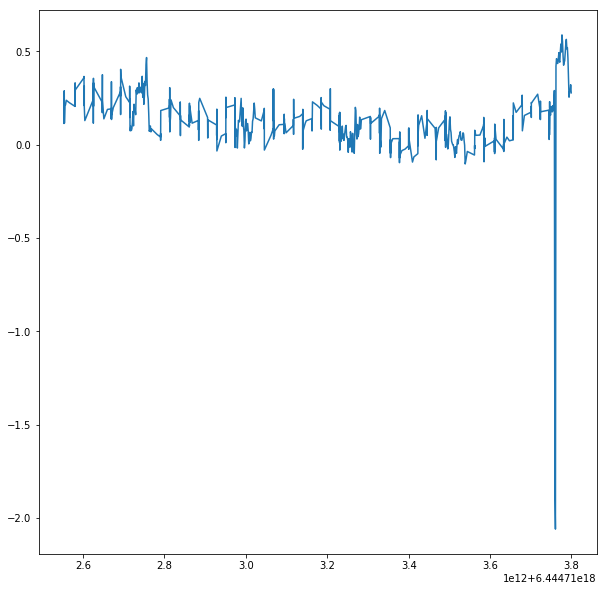

In [44]:
fig=plt.figure(figsize=(10,10))
plt.plot(truedata['measurement_time'],truedata['trans'])
plt.show()
#truedata['trans']
#truedata['measurement_time']